In [636]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import seaborn as sns

In [637]:
df = pd.read_csv('Datasets/Thyroid_Diff.csv')
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [638]:
df['Age'] = df['Age'].astype('float')

In [639]:
# Used for later  transformations 
column_names = df.columns

In [640]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


Plot to visualize the data

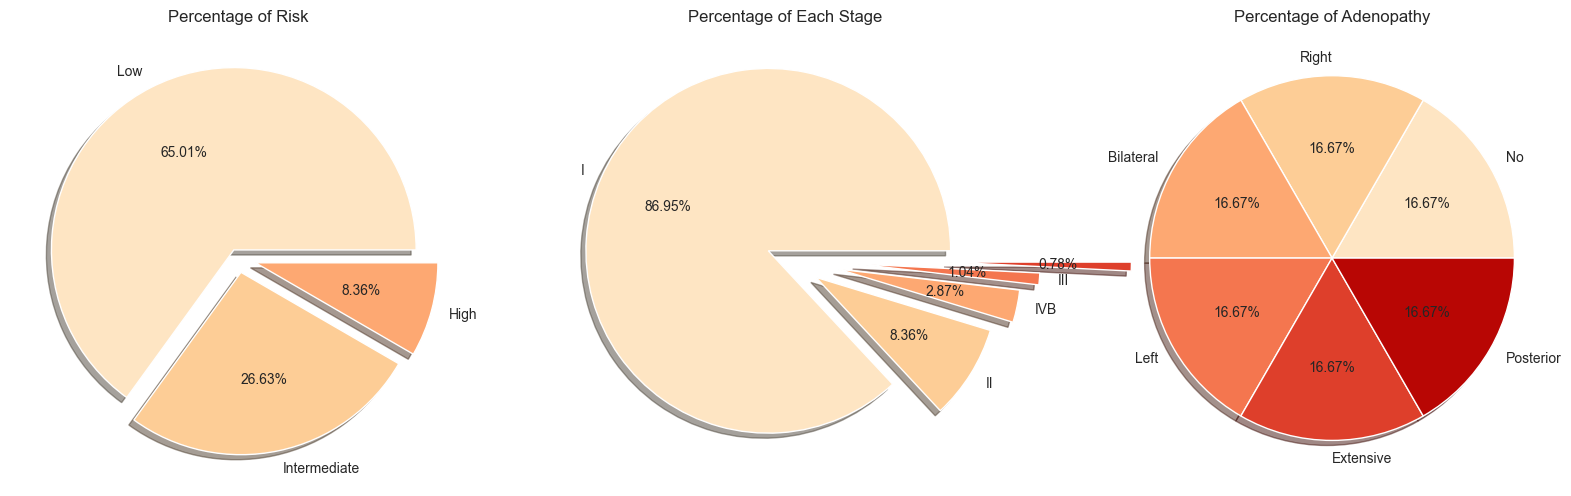

In [641]:
sns.set_palette("OrRd")
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Pie chart for 'Risk'
risky = df['Risk'].value_counts()
risky.plot(kind='pie', autopct='%0.2f%%', explode=[0.05, 0.08, 0.1], labels=risky.index, shadow=True, ax=axes[0])
axes[0].set_title('Percentage of Risk')
axes[0].set_ylabel('')

# Pie chart for 'Stage'
Stage_of_Cancer = df['Stage'].value_counts()
Stage_of_Cancer.plot(kind='pie', autopct='%0.2f%%', labels=Stage_of_Cancer.index, explode=[0.1, 0.2, 0.3, 0.4, 0.9], shadow=True, ax=axes[1])
axes[1].set_title('Percentage of Each Stage')
axes[1].set_ylabel('')

# Pie chart for 'Adenopathy'
aden = df['Adenopathy'].value_counts()
aden.value_counts().plot(kind='pie', autopct='%0.2f%%', labels=aden.index, shadow=True, ax=axes[2])
axes[2].set_title('Percentage of Adenopathy')
axes[2].set_ylabel('')


plt.show()

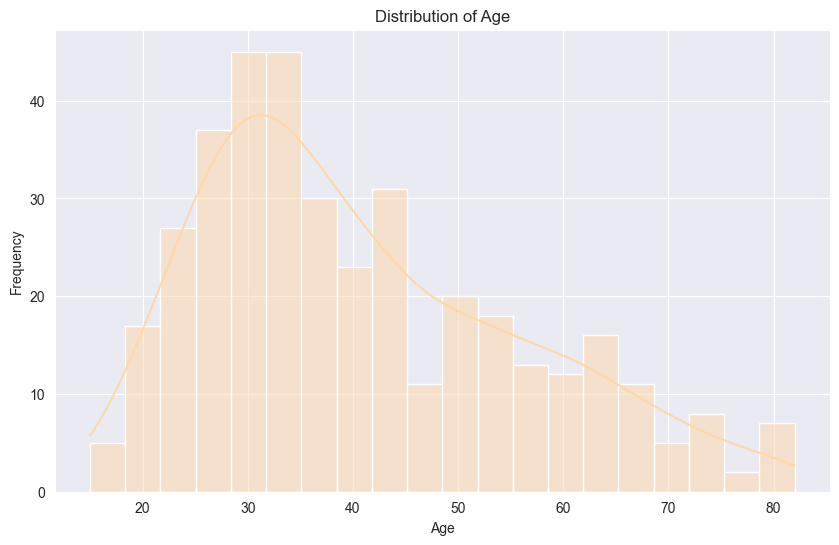

In [642]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='#ffd8a7')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Scale Age feature 

In [643]:
scl = MinMaxScaler()
df.iloc[:, 0] = scl.fit_transform(df.iloc[:, 0:1])

One-Hot Encoding

In [644]:
category_cols = df.select_dtypes(include=['object']).columns.tolist()
category_cols.remove('Recurred')

In [645]:
preprocessor = ColumnTransformer(
    [('onehot', OneHotEncoder(handle_unknown='ignore'), category_cols)],
    remainder='passthrough'
)

In [646]:
df = preprocessor.fit_transform(df)

Split X and y, split to Train/Test

In [647]:
df = pd.DataFrame(df, columns=preprocessor.get_feature_names_out(column_names))
df

,onehot__Gender_F,onehot__Gender_M,onehot__Smoking_No,onehot__Smoking_Yes,onehot__Hx Smoking_No,onehot__Hx Smoking_Yes,onehot__Hx Radiothreapy_No,onehot__Hx Radiothreapy_Yes,onehot__Thyroid Function_Clinical Hyperthyroidism,onehot__Thyroid Function_Clinical Hypothyroidism,...,onehot__Stage_II,onehot__Stage_III,onehot__Stage_IVA,onehot__Stage_IVB,onehot__Response_Biochemical Incomplete,onehot__Response_Excellent,onehot__Response_Indeterminate,onehot__Response_Structural Incomplete,remainder__Age,remainder__Recurred
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.179104,No
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.283582,No
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.223881,No
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.701493,No
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.701493,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.850746,Yes
379,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.985075,Yes
380,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.850746,Yes
381,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.686567,Yes


In [648]:
y = df.iloc[:, -1].values

In [649]:
df = df.drop(columns=['remainder__Recurred'], axis=1)

In [650]:
for x in df.columns[df.dtypes == 'object']:
    df[x] = df[x].astype('float')

In [651]:
X = df.iloc[:]

In [652]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [653]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Building a model from XGBoost

In [654]:
cls_model = XGBClassifier(n_estimators=150, learning_rate=1, max_depth=5, booster='gbtree')

In [655]:
cls_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: >

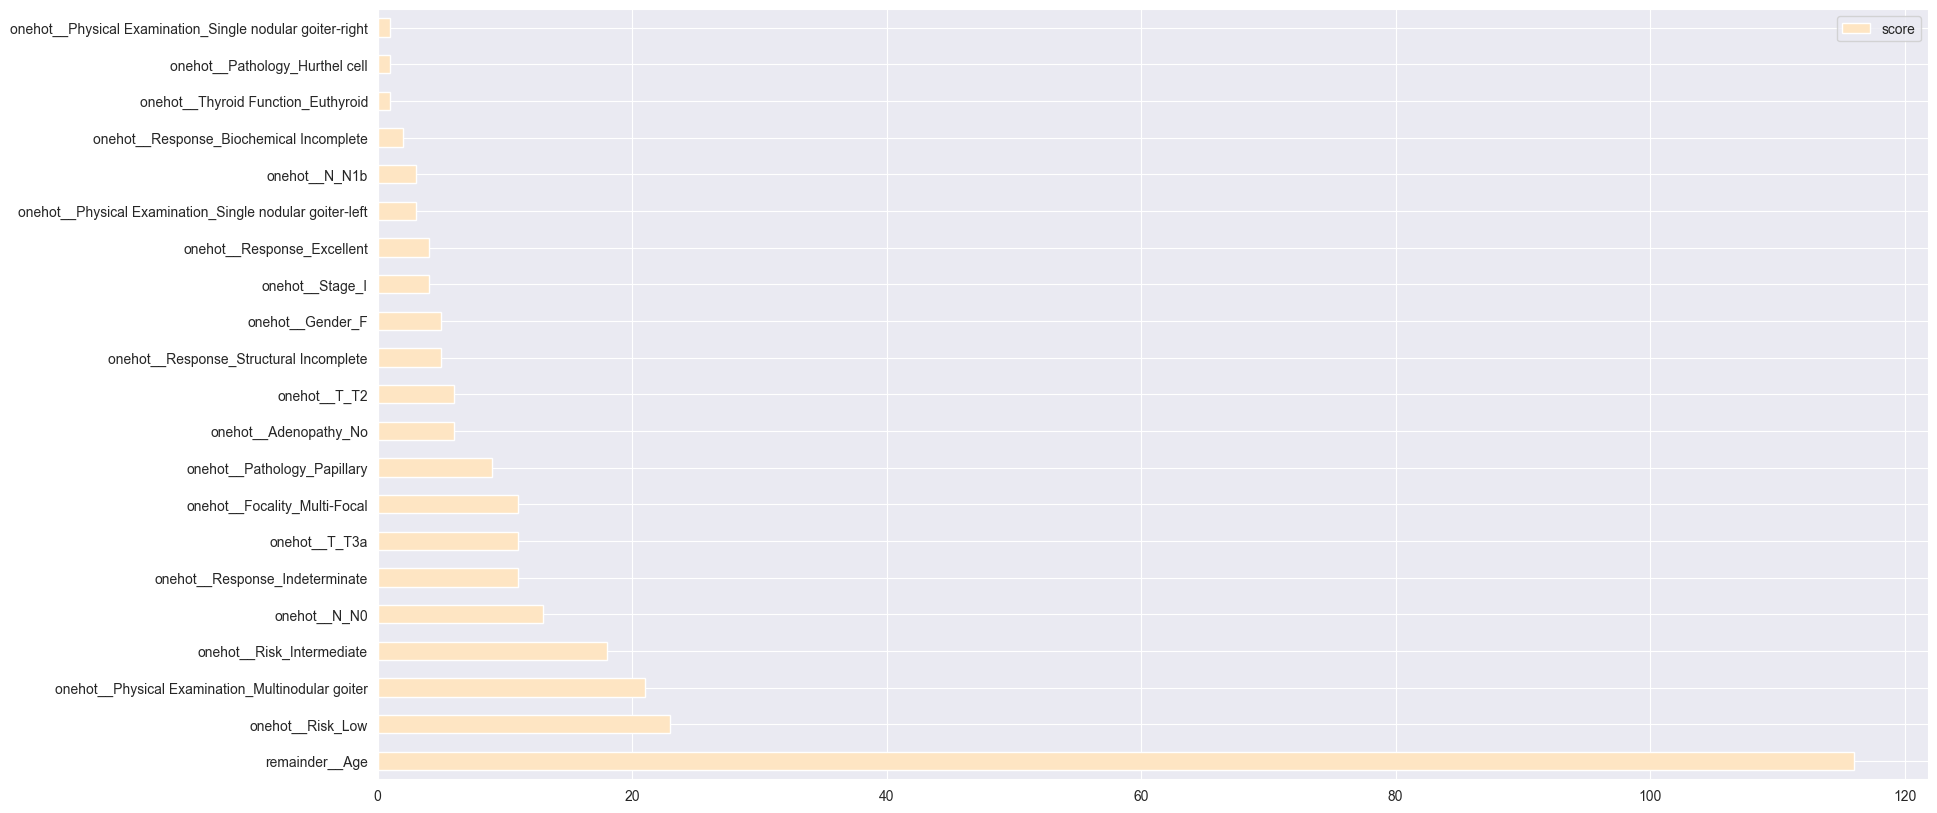

In [656]:
feature_important = cls_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10))

In [657]:
accuracy = metrics.accuracy_score(y_test, cls_model.predict(X_test))
accuracy

0.961038961038961

In [658]:
cfm = metrics.confusion_matrix
cfm(y_test, cls_model.predict(X_test))

array([[57,  1],
       [ 2, 17]], dtype=int64)